In [1]:
import numpy as np
import ipywidgets as widgets
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math
import itertools

In [2]:
## FROM EXAM-SHEET
# a. parameters
N = 50000
mu = np.array([3,2,1])
Sigma = np.array([[0.25, 0, 0], [0, 0.25, 0], [0, 0, 0.25]])
gamma = 0.8
zeta = 1

# b. random draws
seed = 1986
np.random.seed(seed)

# preferences
alphas = np.exp(np.random.multivariate_normal(mu, Sigma, size=N))
betas = alphas/np.reshape(np.sum(alphas,axis=1),(N,1))

# endowments
e1 = np.random.exponential(zeta,size=N)
e2 = np.random.exponential(zeta,size=N)
e3 = np.random.exponential(zeta,size=N)

### Question 1
We plot budget-shares by plotting $\beta$'s, since we have that demand for consumer $j$ is given by:
$$
x^{*j}_1 = \beta^j_i \frac{I_j}{p_i}
$$
and budget-share thereby is given by:
$$
\frac{p_i*x^{*j}_1}{I_j} = \frac{p_i \cdot \beta^j_i \frac{I_j}{p_i}}{I_j} = \beta^j_i
$$

(0, 1)

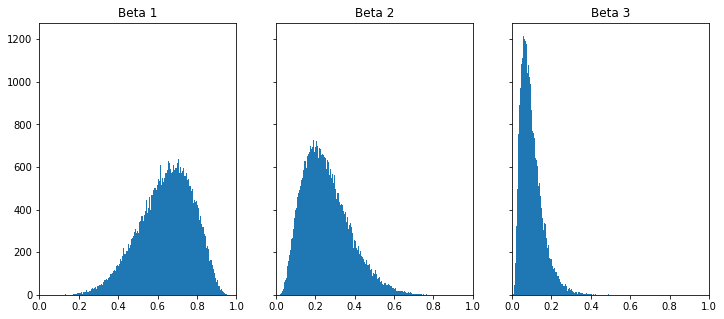

In [4]:
beta_1s = betas[:,0]
beta_2s = betas[:,1]
beta_3s = betas[:,2]

fig1, (ax1,ax2,ax3) = plt.subplots(nrows=1,ncols=3,sharey=True,figsize=(12,5))

ax1.hist(beta_1s, bins=200)
ax1.set_title('Beta 1')
ax1.set_xlim(0,1)

ax2.hist(beta_2s, bins=200)
ax2.set_title('Beta 2')
ax2.set_xlim(0,1)

ax3.hist(beta_3s, bins=200)
ax3.set_title('Beta 3')
ax3.set_xlim(0,1)


### Question 2

In [5]:
def demand_good1(p1,p2,e1,e2,e3,betas):
    I = e1*p1+e2*p2+e3
    return betas[:,0]*I/p1

def demand_good2(p1,p2,e1,e2,e3,betas):
    I = e1*p1+e2*p2+e3
    return betas[:,1]*I/p2

In [6]:
def excess_good1(p1,p2,e1,e2,e3,betas):
    demand = np.sum(demand_good1(p1,p2,e1,e2,e3,betas))
    supply = np.sum(e1)
    excess = demand-supply
    return excess

def excess_good2(p1,p2,e1,e2,e3,betas):
    demand = np.sum(demand_good2(p1,p2,e1,e2,e3,betas))
    supply = np.sum(e2)
    excess = demand-supply
    return excess

size = 100

p1_s = np.linspace(0.5,10,size)
p2_s = np.linspace(0.5,10,size)

excess_1_grid = np.empty((size,size))
excess_2_grid = np.empty((size,size))
excess_3_grid = np.empty((size,size))

p1_grid, p2_grid = np.meshgrid(p1_s, p2_s) 
for i,p1 in enumerate(p1_s):
    for j,p2 in enumerate(p2_s):
        excess_1_grid[i,j] = excess_good1(p1,p2,e1,e2,e3,betas)
        excess_2_grid[i,j] = excess_good2(p1,p2,e1,e2,e3,betas)

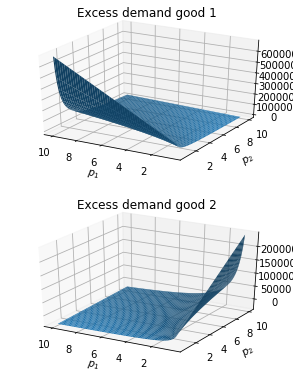

In [27]:
fig = plt.figure(figsize=(5,10))

ax1 = fig.add_subplot(311, projection='3d')
fig1 = ax1.plot_surface(p1_grid,p2_grid,excess_1_grid)
ax1.invert_xaxis()
ax1.set_title('Excess demand good 1')
ax1.set_xlabel('$p_1$')
ax1.set_ylabel('$p_2$')

ax2 = fig.add_subplot(312, projection='3d')
ax2.plot_surface(p1_grid,p2_grid,excess_2_grid)
ax2.invert_xaxis()
ax2.set_title('Excess demand good 2')
ax2.set_xlabel('$p_1$')
ax2.set_ylabel('$p_2$');

### Question 3

In [29]:
p1 = 10
p2 = 2

tol = 0.1**5
kappa = 0.1

t = 1

while t < 100000:
    ex_1 = excess_good1(p1,p2,e1,e2,e3,betas)
    ex_2 = excess_good2(p1,p2,e1,e2,e3,betas)
    
    if abs(ex_1)<tol and abs(ex_2)<tol:
        print(f'\nPrices in Walras equilibrium are: p1 = {p1:.6f} and p2 = {p2:.6f}')
        p1_star = p1
        p2_star = p2
        break
    else:
        p1 += kappa*ex_1/N
        p2 += kappa*ex_2/N
        
    if t%1000 == 0 or t<= 5:
        print(f'Iteration {t:6.0f} -> ex_1: {ex_1:10.4f} ex_2: {ex_2:10.4f} p1-> {p1:10.6f} p2-> {p2:10.6f}')
        
    t += 1

Iteration      1 -> ex_1: -8229.9057 ex_2: 33953.2761 p1->   9.983540 p2->   2.067907
Iteration      2 -> ex_1: -7996.8734 ex_2: 31524.8187 p1->   9.967546 p2->   2.130956
Iteration      3 -> ex_1: -7779.1018 ex_2: 29404.3235 p1->   9.951988 p2->   2.189765
Iteration      4 -> ex_1: -7574.6873 ex_2: 27532.7659 p1->   9.936839 p2->   2.244830
Iteration      5 -> ex_1: -7382.0917 ex_2: 25865.8947 p1->   9.922075 p2->   2.296562
Iteration   1000 -> ex_1:  -577.5643 ex_2:  -215.2719 p1->   7.189169 p2->   2.877381
Iteration   2000 -> ex_1:  -110.2233 ex_2:   -41.1123 p1->   6.612840 p2->   2.662496
Iteration   3000 -> ex_1:   -18.2890 ex_2:    -6.8226 p1->   6.510114 p2->   2.624177
Iteration   4000 -> ex_1:    -2.9564 ex_2:    -1.1029 p1->   6.493289 p2->   2.617901
Iteration   5000 -> ex_1:    -0.4758 ex_2:    -0.1775 p1->   6.490575 p2->   2.616888
Iteration   6000 -> ex_1:    -0.0765 ex_2:    -0.0286 p1->   6.490139 p2->   2.616725
Iteration   7000 -> ex_1:    -0.0123 ex_2:    -0.0046 

### Question 4

In [30]:
def utility(p1, p2, e1, e2, e3, betas, gamma):
    I = p1*e1+p2*e2+e3
    x_1 = betas[:,0]*(I/p1)
    x_2 = betas[:,1]*(I/p2)
    x_3 = betas[:,2]*I
    util = (x_1**betas[:,0]+x_2**betas[:,1]+x_3**betas[:,2])**gamma
    return util

The distribution of the utilities has a mean of 2.376 and a variance of 0.208


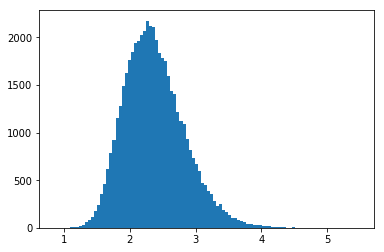

In [31]:
u_vec = utility(p1_star, p2_star, e1, e2, e3, betas, gamma)

plt.hist(u_vec, bins=100);
mean = np.mean(u_vec)
variance = np.var(u_vec)
print(f'The distribution of the utilities has a mean of {mean:.3f} and a variance of {variance:.3f}')

### Question 5

In [32]:
e1_new = np.random.uniform(0,2,size=N)
e2_new = np.random.uniform(0,2,size=N)
e3_new = np.random.uniform(0,2,size=N)

kappa = 0.1

p1 = 10
p2 = 2

t=1

while t < 100000:
    ex_1 = excess_good1(p1,p2,e1_new,e2_new,e3_new,betas)
    ex_2 = excess_good2(p1,p2,e1_new,e2_new,e3_new,betas)
    
    if abs(ex_1)<tol and abs(ex_2)<tol:
        print(f'Prices in Walras equilibrium are: p1 = {p1:10.6f} and p2 = {p2:10.6f}')
        p1_star = p1
        p2_star = p2
        break
    else:
        p1 += kappa*ex_1/N
        p2 += kappa*ex_2/N
    
    if t%1000 == 0 or t<=5:
        print(f'Iteration {t:6.0f} -> ex_1: {ex_1:10.4f} ex_2: {ex_2:10.4f} p1-> {p1:10.6f} p2-> {p2:10.6f}')
    
    t += 1

Iteration      1 -> ex_1: -8279.4364 ex_2: 33918.5176 p1->   9.983441 p2->   2.067837
Iteration      2 -> ex_1: -8045.2115 ex_2: 31484.6524 p1->   9.967351 p2->   2.130806
Iteration      3 -> ex_1: -7826.3696 ex_2: 29359.7571 p1->   9.951698 p2->   2.189526
Iteration      4 -> ex_1: -7620.9898 ex_2: 27484.5716 p1->   9.936456 p2->   2.244495
Iteration      5 -> ex_1: -7427.5202 ex_2: 25814.6782 p1->   9.921601 p2->   2.296124
Iteration   1000 -> ex_1:  -591.7765 ex_2:  -220.0039 p1->   7.123573 p2->   2.843140
Iteration   2000 -> ex_1:  -110.1639 ex_2:   -40.9854 p1->   6.537907 p2->   2.625332
Iteration   3000 -> ex_1:   -17.7475 ex_2:    -6.6038 p1->   6.436306 p2->   2.587529
Iteration   4000 -> ex_1:    -2.7850 ex_2:    -1.0363 p1->   6.420151 p2->   2.581518
Iteration   5000 -> ex_1:    -0.4352 ex_2:    -0.1619 p1->   6.417621 p2->   2.580577
Iteration   6000 -> ex_1:    -0.0680 ex_2:    -0.0253 p1->   6.417226 p2->   2.580430
Iteration   7000 -> ex_1:    -0.0106 ex_2:    -0.0039 

The distribution of the utilities has a mean of 2.376 and a variance of 0.208


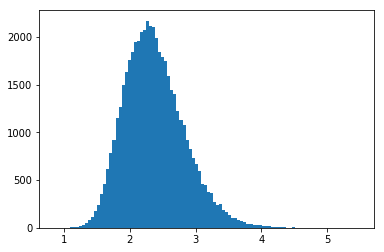

In [36]:
gamma = .8

u_vec = utility(p1_star, p2_star, e1, e2, e3, betas, gamma)

plt.hist(u_vec, bins=100);
mean = np.mean(u_vec)
variance = np.var(u_vec)
print(f'The distribution of the utilities has a mean of {mean:.3f} and a variance of {variance:.3f}')